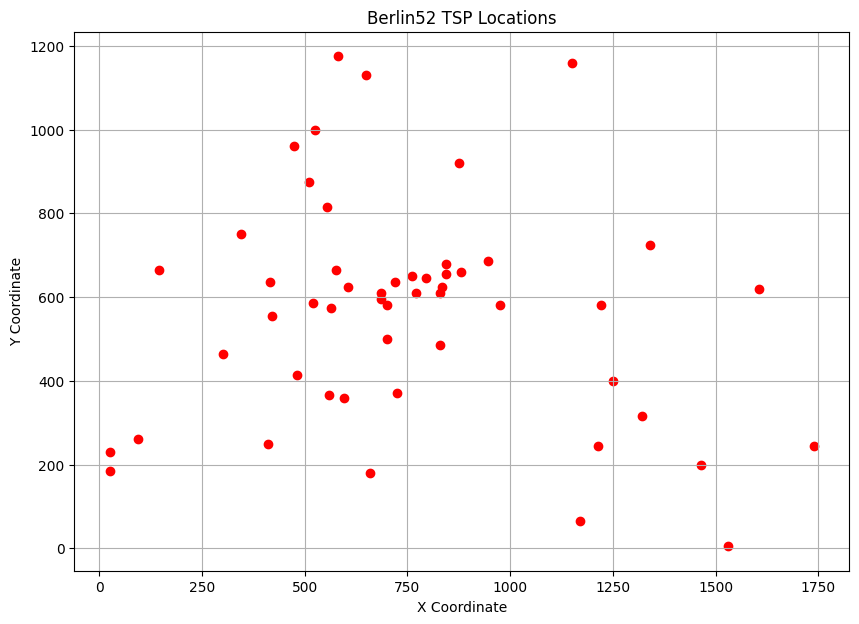

In [ ]:
import matplotlib.pyplot as plt


dataset = berlin52 = [
    (565, 575), (25, 185), (345, 750), (945, 685), (845, 655),
    (880, 660), (25, 230), (525, 1000), (580, 1175), (650, 1130), (1605, 620),
    (1220, 580), (1465, 200), (1530, 5), (845, 680), (725, 370), (145, 665),
    (415, 635), (510, 875), (560, 365), (300, 465), (520, 585), (480, 415),
    (835, 625), (975, 580), (1215, 245), (1320, 315), (1250, 400), (660, 180),
    (410, 250), (420, 555), (575, 665), (1150, 1160), (700, 580), (685, 595),
    (685, 610), (770, 610), (795, 645), (720, 635), (760, 650), (475, 960),
    (95, 260), (875, 920), (700, 500), (555, 815), (830, 485), (1170, 65),
    (830, 610), (605, 625), (595, 360), (1340, 725), (1740, 245)
]

x = [city[0] for city in berlin52]
y = [city[1] for city in berlin52]

# Plotting the Berlin52 points
plt.figure(figsize=(10, 7))
plt.scatter(x, y, c='red', marker='o')
plt.title("Berlin52 TSP Locations")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()

In [ ]:
import math


def plot(tour, total_distance, title):
  # Plotting the tour
  x = [dataset[i][0] for i in tour + [tour[0]]]
  y = [dataset[i][1] for i in tour + [tour[0]]]

  plt.figure(figsize=(10, 7))
  plt.plot(x, y, 'o-', label=f"Total distance: {total_distance:.2f}")
  plt.title(title)
  plt.xlabel("X Coordinate")
  plt.ylabel("Y Coordinate")
  plt.grid(True)
  plt.legend()
  plt.show()

# ⛏ Thain Piedraávida

> *Greedy search*

In [ ]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)


def greedy_tsp(cities, start=0):
    n = len(cities)
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    total_distance = 0

    current_city = start
    while unvisited:
        next_city = min(unvisited, key=lambda city: distance(cities[current_city], cities[city]))
        total_distance += distance(cities[current_city], cities[next_city])
        tour.append(next_city)
        current_city = next_city
        unvisited.remove(next_city)

    total_distance += distance(cities[current_city], cities[start])
    return tour, total_distance


tour, total_distance = greedy_tsp(dataset)
plot(tour, total_distance, "Greedy TSP Solution for Berlin 52")

#### ✅ Rapidez
#### ✅ Sencillo de implementar
#### ❌ Puede quedar atrapado en óptimos locales
#### ❌ No reconsideración
#### ❌ Sensible a las condiciones iniciales

# 🏹 Veto

> *Tabu search*

In [ ]:
import random


def tour_distance(tour):
    return sum(distance(dataset[tour[i]], dataset[tour[(i + 1) % len(tour)]]) for i in range(len(tour)))


def initial_solution(cities):
    tour = list(range(len(cities)))
    random.shuffle(tour)
    return tour


def two_opt_swap(tour):
    n = len(tour)
    i, j = sorted(random.sample(range(n), 2))
    new_tour = tour[:]
    new_tour[i:j] = reversed(tour[i:j])
    return new_tour


def tabu_search(cities, iterations, tabu_size, neighbor_size):
    best_tour = initial_solution(cities)
    best_cost = tour_distance(best_tour)
    current_tour = best_tour[:]
    current_cost = best_cost
    tabu_list = []

    for _ in range(iterations):
        neighbors = []
        for _ in range(neighbor_size):
            new_tour = two_opt_swap(current_tour)
            neighbors.append((tour_distance(new_tour), new_tour))

        neighbors.sort(key=lambda x: x[0])

        for cost, tour in neighbors:
            if tour not in tabu_list or cost < best_cost:
                current_tour = tour
                current_cost = cost
                if cost < best_cost:
                    best_tour = tour
                    best_cost = cost
                break

        tabu_list.append(current_tour)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

    return best_tour, best_cost


iterations = 1000
tabu_size = 50
neighbor_size = 20

best_tour, best_cost = tabu_search(dataset, iterations, tabu_size, neighbor_size)

plot(best_tour, best_cost, "Tabu Search TSP Solution for Berlin 52")

print("Best tour:", best_tour)
print("Best cost:", best_cost)


#### ✅ Diseñado para esquivar óptimos locales
#### ✅ Muy flexbile
#### ✅ Buena memoria
#### ❌ Sensible a las condiciones iniciales y a la solución inicial
#### ❌ Puede incurrir en alto coste computacional

# 🧙 Lady Ann

> Simulated Annealing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_distance_matrix(coordinates):
    num_cities = len(coordinates)
    distances = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                point1 = np.array(coordinates[i])
                point2 = np.array(coordinates[j])
                distances[i, j] = np.linalg.norm(point1 - point2)
    return distances


def calculate_total_distance(tour, distances):
    return sum(distances[tour[i], tour[(i + 1) % len(tour)]] for i in range(len(tour)))


def swap_cities(tour):
    a, b = np.random.choice(len(tour), 2, replace=False)
    tour[a], tour[b] = tour[b], tour[a]
    return tour


def simulated_annealing(coordinates, initial_temp, cooling_rate, num_iterations):
    distances = calculate_distance_matrix(coordinates)
    num_cities = len(coordinates)
    current_tour = np.random.permutation(num_cities)
    current_distance = calculate_total_distance(current_tour, distances)
    temperature = initial_temp
    best_tour = current_tour.copy()
    best_distance = current_distance

    for iteration in range(num_iterations):
        new_tour = swap_cities(current_tour.copy())
        new_distance = calculate_total_distance(new_tour, distances)
        exp = np.exp((current_distance - new_distance) / temperature)
        if new_distance < current_distance or np.random.rand() < exp:
            current_tour, current_distance = new_tour, new_distance
            if new_distance < best_distance:
                best_tour, best_distance = new_tour.copy(), new_distance
        temperature *= cooling_rate

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: Best Distance = {best_distance}")

    return best_tour, best_distance


initial_temp = 10000
cooling_rate = 0.995
num_iterations = 10000

best_tour, best_distance = simulated_annealing(dataset, initial_temp, cooling_rate, num_iterations)
print("Best Tour:", best_tour)
print("Best Distance:", best_distance)


plt.figure(figsize=(10, 6))
x, y = zip(*[berlin52[i] for i in best_tour])
x += (x[0],)  # Return to the start point
y += (y[0],)
plt.plot(x, y, 'o-', markersize=5, linewidth=1)
plt.scatter(x[0], y[0], color='red')  # Start city
plt.title('Simulated Annealing TSP Solution for Berlin52')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


#### ✅ Capaz de escapar de mínimos locales gracias a su mecanismo probabilístico.
#### ✅ Flexibilidad
#### ❌ No convergencia
#### ❌ Sensible a las condiciones iniciales de temperatura y enfriamiento
#### ❌ Puede incurrir en alto coste computacional